# Trabajo en grupo - Análisis de turismo en Cantabria

**Introducción**

El objetivo de este trabajo es realizar un análisis socio económico del impacto del turismo en Cantabria. Para ello se obtendrán datos del ICANE y de otras fuentes que se utilizarán para realizar los distintos análisis del trabajo.

**Integrantes del equipo**
- Ezequiel Cimadevilla Álvarez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools as it

In [2]:
%matplotlib inline

## Fuentes de datos

Datasets turísticos del ICANE:

- Dataset download - [Viajeros, pernoctaciones y estancia media según procedencia y zonas](http://www.icane.es/data/api/travelers-overnight-stays-average-stays-origin-areas.csv?s=%5Bd_mes.h_mes%5Df%3D%5B2006-Enero%5D%2C%5B2006-Febrero%5D%2C%5B2006-Marzo%5D%2C%5B2006-Abril%5D%2C%5B2006-Mayo%5D%2C%5B2006-Junio%5D%2C%5B2006-Julio%5D%2C%5B2006-Agosto%5D%2C%5B2006-Septiembre%5D%2C%5B2006-Octubre%5D%2C%5B2006-Noviembre%5D%2C%5B2006-Diciembre%5D%2C%5B2007-Enero%5D%2C%5B2007-Febrero%5D%2C%5B2007-Marzo%5D%2C%5B2007-Abril%5D%2C%5B2007-Mayo%5D%2C%5B2007-Junio%5D%2C%5B2007-Julio%5D%2C%5B2007-Agosto%5D%2C%5B2007-Septiembre%5D%2C%5B2007-Octubre%5D%2C%5B2007-Noviembre%5D%2C%5B2007-Diciembre%5D%2C%5B2008-Enero%5D%2C%5B2008-Febrero%5D%2C%5B2008-Marzo%5D%2C%5B2008-Abril%5D%2C%5B2008-Mayo%5D%2C%5B2008-Junio%5D%2C%5B2008-Julio%5D%2C%5B2008-Agosto%5D%2C%5B2008-Septiembre%5D%2C%5B2008-Octubre%5D%2C%5B2008-Noviembre%5D%2C%5B2008-Diciembre%5D%2C%5B2009-Enero%5D%2C%5B2009-Febrero%5D%2C%5B2009-Marzo%5D%2C%5B2009-Abril%5D%2C%5B2009-Mayo%5D%2C%5B2009-Junio%5D%2C%5B2009-Julio%5D%2C%5B2009-Agosto%5D%2C%5B2009-Septiembre%5D%2C%5B2009-Octubre%5D%2C%5B2009-Noviembre%5D%2C%5B2009-Diciembre%5D%2C%5B2010-Enero%5D%2C%5B2010-Febrero%5D%2C%5B2010-Marzo%5D%2C%5B2010-Abril%5D%2C%5B2010-Mayo%5D%2C%5B2010-Junio%5D%2C%5B2010-Julio%5D%2C%5B2010-Agosto%5D%2C%5B2010-Septiembre%5D%2C%5B2010-Octubre%5D%2C%5B2010-Noviembre%5D%2C%5B2010-Diciembre%5D%2C%5B2011-Enero%5D%2C%5B2011-Febrero%5D%2C%5B2011-Marzo%5D%2C%5B2011-Abril%5D%2C%5B2011-Mayo%5D%2C%5B2011-Junio%5D%2C%5B2011-Julio%5D%2C%5B2011-Agosto%5D%2C%5B2011-Septiembre%5D%2C%5B2011-Octubre%5D%2C%5B2011-Noviembre%5D%2C%5B2011-Diciembre%5D%2C%5B2012-Enero%5D%2C%5B2012-Febrero%5D%2C%5B2012-Marzo%5D%2C%5B2012-Abril%5D%2C%5B2012-Mayo%5D%2C%5B2012-Junio%5D%2C%5B2012-Julio%5D%2C%5B2012-Agosto%5D%2C%5B2012-Septiembre%5D%2C%5B2012-Octubre%5D%2C%5B2012-Noviembre%5D%2C%5B2012-Diciembre%5D%2C%5B2013-Enero%5D%2C%5B2013-Febrero%5D%2C%5B2013-Marzo%5D%2C%5B2013-Abril%5D%2C%5B2013-Mayo%5D%2C%5B2013-Junio%5D%2C%5B2013-Julio%5D%2C%5B2013-Agosto%5D%2C%5B2013-Septiembre%5D%2C%5B2013-Octubre%5D%2C%5B2013-Noviembre%5D%2C%5B2013-Diciembre%5D%2C%5B2014-Enero%5D%2C%5B2014-Febrero%5D%2C%5B2014-Marzo%5D%2C%5B2014-Abril%5D%2C%5B2014-Mayo%5D%2C%5B2014-Junio%5D%2C%5B2014-Julio%5D%2C%5B2014-Agosto%5D%2C%5B2014-Septiembre%5D%2C%5B2014-Octubre%5D%2C%5B2014-Noviembre%5D%2C%5B2014-Diciembre%5D%2C%5B2015-Enero%5D%2C%5B2015-Febrero%5D%2C%5B2015-Marzo%5D%2C%5B2015-Abril%5D%2C%5B2015-Mayo%5D%2C%5B2015-Junio%5D%2C%5B2015-Julio%5D%2C%5B2015-Agosto%5D%2C%5B2015-Septiembre%5D%2C%5B2015-Octubre%5D%2C%5B2015-Noviembre%5D%2C%5B2015-Diciembre%5D%2C%5B2016-Enero%5D%2C%5B2016-Febrero%5D%2C%5B2016-Marzo%5D%2C%5B2016-Abril%5D%2C%5B2016-Mayo%5D%2C%5B2016-Junio%5D%2C%5B2016-Julio%5D%2C%5B2016-Agosto%5D%2C%5B2016-Septiembre%5D%2C%5B2016-Octubre%5D%2C%5B2016-Noviembre%5D%2C%5B2016-Diciembre%5D%2C%5B2017-Enero%5D%2C%5B2017-Febrero%5D%2C%5B2017-Marzo%5D%2C%5B2017-Abril%5D%2C%5B2017-Mayo%5D%2C%5B2017-Junio%5D%2C%5B2017-Julio%5D%2C%5B2017-Agosto%5D%2C%5B2017-Septiembre%5D%2C%5B2017-Octubre%5D%2C%5B2017-Noviembre%5D%2C%5B2017-Diciembre%5D%2C%5B2018-Enero%5D%2C%5B2018-Febrero%5D%2C%5B2018-Marzo%5D%2C%5B2018-Abril%5D%2C%5B2018-Mayo%5D%2C%5B2018-Junio%5D%2C%5B2018-Julio%5D%2C%5B2018-Agosto%5D%2C%5B2018-Septiembre%5D%2C%5B2018-Octubre%5D%2C%5B2018-Noviembre%5D%3B%5Bd_zona.h_zona%5Dc%3B%5Bd_procedencia.h_procedencia%5Dc%3B%5BMeasures%5Dc)
- (CREO Q ES IGUAL QUE EL ANTERIOR O MUY PARECIDO) Dataset download - [Viajeros, pernoctaciones, estancia media, grados de ocupación, establecimientos y plazas según categorias y zonas](http://www.icane.es/data/api/travelers-overnight-stays-average-stays-occupancy-establishment-places-categories-areas.csv?s=%5Bd_mes.h_mes%5Df%3D%5B2006-Enero%5D%2C%5B2006-Febrero%5D%2C%5B2006-Marzo%5D%2C%5B2006-Abril%5D%2C%5B2006-Mayo%5D%2C%5B2006-Junio%5D%2C%5B2006-Julio%5D%2C%5B2006-Agosto%5D%2C%5B2006-Septiembre%5D%2C%5B2006-Octubre%5D%2C%5B2006-Noviembre%5D%2C%5B2006-Diciembre%5D%2C%5B2007-Enero%5D%2C%5B2007-Febrero%5D%2C%5B2007-Marzo%5D%2C%5B2007-Abril%5D%2C%5B2007-Mayo%5D%2C%5B2007-Junio%5D%2C%5B2007-Julio%5D%2C%5B2007-Agosto%5D%2C%5B2007-Septiembre%5D%2C%5B2007-Octubre%5D%2C%5B2007-Noviembre%5D%2C%5B2007-Diciembre%5D%2C%5B2008-Enero%5D%2C%5B2008-Febrero%5D%2C%5B2008-Marzo%5D%2C%5B2008-Abril%5D%2C%5B2008-Mayo%5D%2C%5B2008-Junio%5D%2C%5B2008-Julio%5D%2C%5B2008-Agosto%5D%2C%5B2008-Septiembre%5D%2C%5B2008-Octubre%5D%2C%5B2008-Noviembre%5D%2C%5B2008-Diciembre%5D%2C%5B2009-Enero%5D%2C%5B2009-Febrero%5D%2C%5B2009-Marzo%5D%2C%5B2009-Abril%5D%2C%5B2009-Mayo%5D%2C%5B2009-Junio%5D%2C%5B2009-Julio%5D%2C%5B2009-Agosto%5D%2C%5B2009-Septiembre%5D%2C%5B2009-Octubre%5D%2C%5B2009-Noviembre%5D%2C%5B2009-Diciembre%5D%2C%5B2010-Enero%5D%2C%5B2010-Febrero%5D%2C%5B2010-Marzo%5D%2C%5B2010-Abril%5D%2C%5B2010-Mayo%5D%2C%5B2010-Junio%5D%2C%5B2010-Julio%5D%2C%5B2010-Agosto%5D%2C%5B2010-Septiembre%5D%2C%5B2010-Octubre%5D%2C%5B2010-Noviembre%5D%2C%5B2010-Diciembre%5D%2C%5B2011-Enero%5D%2C%5B2011-Febrero%5D%2C%5B2011-Marzo%5D%2C%5B2011-Abril%5D%2C%5B2011-Mayo%5D%2C%5B2011-Junio%5D%2C%5B2011-Julio%5D%2C%5B2011-Agosto%5D%2C%5B2011-Septiembre%5D%2C%5B2011-Octubre%5D%2C%5B2011-Noviembre%5D%2C%5B2011-Diciembre%5D%2C%5B2012-Enero%5D%2C%5B2012-Febrero%5D%2C%5B2012-Marzo%5D%2C%5B2012-Abril%5D%2C%5B2012-Mayo%5D%2C%5B2012-Junio%5D%2C%5B2012-Julio%5D%2C%5B2012-Agosto%5D%2C%5B2012-Septiembre%5D%2C%5B2012-Octubre%5D%2C%5B2012-Noviembre%5D%2C%5B2012-Diciembre%5D%2C%5B2013-Enero%5D%2C%5B2013-Febrero%5D%2C%5B2013-Marzo%5D%2C%5B2013-Abril%5D%2C%5B2013-Mayo%5D%2C%5B2013-Junio%5D%2C%5B2013-Julio%5D%2C%5B2013-Agosto%5D%2C%5B2013-Septiembre%5D%2C%5B2013-Octubre%5D%2C%5B2013-Noviembre%5D%2C%5B2013-Diciembre%5D%2C%5B2014-Enero%5D%2C%5B2014-Febrero%5D%2C%5B2014-Marzo%5D%2C%5B2014-Abril%5D%2C%5B2014-Mayo%5D%2C%5B2014-Junio%5D%2C%5B2014-Julio%5D%2C%5B2014-Agosto%5D%2C%5B2014-Septiembre%5D%2C%5B2014-Octubre%5D%2C%5B2014-Noviembre%5D%2C%5B2014-Diciembre%5D%2C%5B2015-Enero%5D%2C%5B2015-Febrero%5D%2C%5B2015-Marzo%5D%2C%5B2015-Abril%5D%2C%5B2015-Mayo%5D%2C%5B2015-Junio%5D%2C%5B2015-Julio%5D%2C%5B2015-Agosto%5D%2C%5B2015-Septiembre%5D%2C%5B2015-Octubre%5D%2C%5B2015-Noviembre%5D%2C%5B2015-Diciembre%5D%2C%5B2016-Enero%5D%2C%5B2016-Febrero%5D%2C%5B2016-Marzo%5D%2C%5B2016-Abril%5D%2C%5B2016-Mayo%5D%2C%5B2016-Junio%5D%2C%5B2016-Julio%5D%2C%5B2016-Agosto%5D%2C%5B2016-Septiembre%5D%2C%5B2016-Octubre%5D%2C%5B2016-Noviembre%5D%2C%5B2016-Diciembre%5D%2C%5B2017-Enero%5D%2C%5B2017-Febrero%5D%2C%5B2017-Marzo%5D%2C%5B2017-Abril%5D%2C%5B2017-Mayo%5D%2C%5B2017-Junio%5D%2C%5B2017-Julio%5D%2C%5B2017-Agosto%5D%2C%5B2017-Septiembre%5D%2C%5B2017-Octubre%5D%2C%5B2017-Noviembre%5D%2C%5B2017-Diciembre%5D%2C%5B2018-Enero%5D%2C%5B2018-Febrero%5D%2C%5B2018-Marzo%5D%2C%5B2018-Abril%5D%2C%5B2018-Mayo%5D%2C%5B2018-Junio%5D%2C%5B2018-Julio%5D%2C%5B2018-Agosto%5D%2C%5B2018-Septiembre%5D%2C%5B2018-Octubre%5D%2C%5B2018-Noviembre%5D%3B%5Bd_categoria.h_categoria%5Dc%3B%5Bd_zona.h_zona%5Dc%3B%5BMeasures%5Dc)

In [23]:
df1 = pd.read_csv('Viajeros, pernoctaciones y estancia media según procedencia y zonas-1.csv', index_col=0)
df1.head()

,Cantabria - Total - Viajeros,Cantabria - Total - Pernoctaciones,Cantabria - Total - Estancia media,Cantabria - Españoles - Viajeros,Cantabria - Españoles - Pernoctaciones,Cantabria - Españoles - Estancia media,Cantabria - Andalucía - Viajeros,Cantabria - Andalucía - Pernoctaciones,Cantabria - Andalucía - Estancia media,Cantabria - Asturias (Principado de) - Viajeros,...,Trasmiera - Resto Unión Europea - Estancia media,Trasmiera - Resto Europa - Viajeros,Trasmiera - Resto Europa - Pernoctaciones,Trasmiera - Resto Europa - Estancia media,Trasmiera - América - Viajeros,Trasmiera - América - Pernoctaciones,Trasmiera - América - Estancia media,Trasmiera - Resto del mundo - Viajeros,Trasmiera - Resto del mundo - Pernoctaciones,Trasmiera - Resto del mundo - Estancia media
2006-Enero,37834,65565,1.73,34260,58861,1.72,817,1829,2.24,2872,...,NaN,23.0,32.0,1.41,9.0,23.0,2.65,10.0,10.0,1.02
2006-Febrero,46180,90758,1.97,41748,82139,1.97,1327,2638,1.99,3964,...,NaN,NaN,NaN,NaN,10.0,22.0,2.09,NaN,NaN,NaN
2006-Marzo,67903,141567,2.08,59355,124544,2.10,2776,6442,2.32,4645,...,NaN,15.0,71.0,4.57,33.0,72.0,2.14,29.0,63.0,2.14
2006-Abril,103881,221868,2.14,91147,198678,2.18,3124,6720,2.15,5627,...,1.22,19.0,17.0,0.92,13.0,15.0,1.15,58.0,60.0,1.02
2006-Mayo,99932,204780,2.05,82132,167659,2.04,3233,7649,2.37,5934,...,1.42,5.0,10.0,2.26,48.0,65.0,1.35,377.0,2765.0,7.33


In [4]:
df1.describe()

,Cantabria - Total - Viajeros,Cantabria - Total - Pernoctaciones,Cantabria - Total - Estancia media,Cantabria - Españoles - Viajeros,Cantabria - Españoles - Pernoctaciones,Cantabria - Españoles - Estancia media,Cantabria - Andalucía - Viajeros,Cantabria - Andalucía - Pernoctaciones,Cantabria - Andalucía - Estancia media,Cantabria - Asturias (Principado de) - Viajeros,...,Trasmiera - Resto Unión Europea - Estancia media,Trasmiera - Resto Europa - Viajeros,Trasmiera - Resto Europa - Pernoctaciones,Trasmiera - Resto Europa - Estancia media,Trasmiera - América - Viajeros,Trasmiera - América - Pernoctaciones,Trasmiera - América - Estancia media,Trasmiera - Resto del mundo - Viajeros,Trasmiera - Resto del mundo - Pernoctaciones,Trasmiera - Resto del mundo - Estancia media
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,137.000000,126.000000,123.000000,121.000000,136.000000,136.000000,132.000000,131.000000,129.000000,126.000000
mean,92907.793548,213661.116129,2.190000,75969.083871,178840.522581,2.224839,4687.206452,13173.554839,2.706581,4414.451613,...,2.130146,70.904762,175.373984,2.369669,84.911765,161.727941,1.996894,401.938931,1196.744186,2.861270
std,47002.199391,131803.659126,0.245177,37586.013454,113064.013480,0.287064,3118.052924,9484.265248,0.475956,1042.849320,...,0.946124,86.018829,252.482767,1.559148,82.766380,185.942861,1.586793,386.776953,1258.829753,1.841474
min,29038.000000,53440.000000,1.730000,25261.000000,45955.000000,1.710000,722.000000,1402.000000,1.630000,2119.000000,...,0.940000,3.000000,5.000000,0.730000,3.000000,5.000000,0.730000,4.000000,9.000000,0.860000
25%,49557.500000,102655.000000,2.025000,42995.000000,89846.000000,2.035000,2041.500000,5174.000000,2.335000,3628.000000,...,1.530000,16.000000,32.500000,1.340000,28.000000,45.000000,1.350000,59.000000,124.000000,1.710000
50%,86760.000000,187275.000000,2.170000,68566.000000,151093.000000,2.210000,3823.000000,10250.000000,2.750000,4608.000000,...,1.960000,35.000000,76.000000,2.080000,49.000000,97.000000,1.615000,275.000000,846.000000,2.455000
75%,119386.000000,276443.000000,2.280000,93972.000000,214851.500000,2.340000,6874.000000,20403.000000,3.010000,5085.500000,...,2.350000,91.000000,199.500000,2.830000,119.500000,227.250000,2.142500,627.500000,2055.000000,3.387500
max,215836.000000,569442.000000,2.990000,177373.000000,516662.000000,3.140000,14366.000000,42882.000000,4.980000,6685.000000,...,8.120000,508.000000,1464.000000,10.450000,468.000000,1306.000000,17.040000,1551.000000,5853.000000,16.100000


In [21]:
# Name and index of every column, to use as reference
for idx,c in enumerate(df1.columns):
    print(idx,c)

0 Cantabria - Total - Viajeros
1 Cantabria - Total - Pernoctaciones
2 Cantabria - Total - Estancia media
3 Cantabria - Españoles - Viajeros
4 Cantabria - Españoles - Pernoctaciones
5 Cantabria - Españoles - Estancia media
6 Cantabria - Andalucía - Viajeros
7 Cantabria - Andalucía - Pernoctaciones
8 Cantabria - Andalucía - Estancia media
9 Cantabria - Asturias (Principado de) - Viajeros
10 Cantabria - Asturias (Principado de) - Pernoctaciones
11 Cantabria - Asturias (Principado de) - Estancia media
12 Cantabria - Cantabria - Viajeros
13 Cantabria - Cantabria - Pernoctaciones
14 Cantabria - Cantabria - Estancia media
15 Cantabria - Castilla y León - Viajeros
16 Cantabria - Castilla y León - Pernoctaciones
17 Cantabria - Castilla y León - Estancia media
18 Cantabria - Cataluña - Viajeros
19 Cantabria - Cataluña - Pernoctaciones
20 Cantabria - Cataluña - Estancia media
21 Cantabria - Galicia - Viajeros
22 Cantabria - Galicia - Pernoctaciones
23 Cantabria - Galicia - Estancia media
24 Canta

In [6]:
# Este bloque solo contiene un pequeño test para asegurarnos que los datos del index son correctos
years = list(range(2006,2019))
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', \
               'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Manually generated index column. Note that '2018-Diciembre' is excluded
index = ['-'.join(map(str, i)) for i in list(it.product(years,month_names))][:-1]

# Defensive test, assert that index from data frame is correct
if (index == df1.index).all():
    print('Dateset index - OK!')
else:
    print('Dataset index - ERROR, please check data frame\'s index values')

Dateset index - OK!


In [26]:
df1.index = df1.index.str.split('-', expand=True)

## Procedencia de los turistas

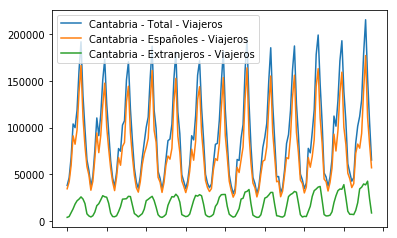

In [24]:
df1[df1.columns[[0,3,33]]].plot()